# LinearRegression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
# read cars.csv
data = pd.read_csv("data/locations.csv")
data

,Unnamed: 0,loyer,surface
0,0,1330,37
1,1,1400,32
2,2,904,26
3,3,955,30
4,4,2545,70
...,...,...,...
531,540,1490,48
532,541,2020,58
533,542,2050,70
534,543,1220,42


Equation de la droite de régression linéaire

![Texte alternatif](./img/regrLinaire_location.png "Titre de l'image").

In [10]:
data["one"]= np.ones(data.shape[0])
# on ajoute une colonne de 1 pour la regression lineaire
data

,Unnamed: 0,loyer,surface,one
0,0,1330,37,1.0
1,1,1400,32,1.0
2,2,904,26,1.0
3,3,955,30,1.0
4,4,2545,70,1.0
...,...,...,...,...
531,540,1490,48,1.0
532,541,2020,58,1.0
533,542,2050,70,1.0
534,543,1220,42,1.0


In [11]:
X = data.drop(["loyer"], axis=1)
Y = data["loyer"]

In [12]:
model = LinearRegression()
model.fit(X, Y)
Ypred = model.predict(X)
model.score(X, Y)

0.8251477073396429

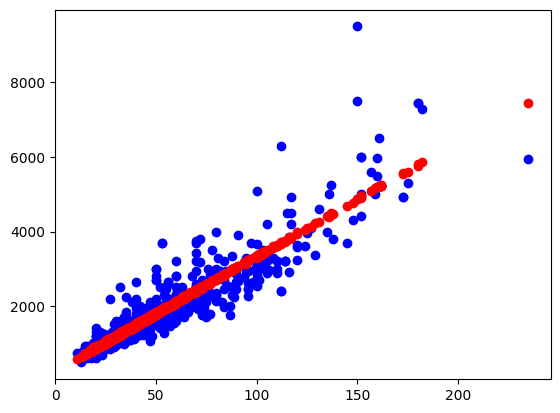

In [13]:
plt.scatter(data=data, x="surface", y="loyer", c="b")
plt.scatter(x=data["surface"], y=Ypred, c="r")

# Creation de fausse donnée pour utiliser regr linéaire avec polynomes

In [14]:
# creation de fausse donnée 
x=np.linspace(-2, 2, 100)
noise = np.random.normal(0, 0.3, 100)
data = pd.DataFrame(x, columns=["x"])
data["y"] = (data["x"]*abs(data["x"]/2))+noise
data["one"]= np.ones(data.shape[0])
data["x**2"]= data["x"]**2
data["x**3"] = data["x"]**3

data

,x,y,one,x**2,x**3
0,-2.000000,-1.977302,1.0,4.000000,-8.000000
1,-1.959596,-1.881701,1.0,3.840016,-7.524880
2,-1.919192,-1.520799,1.0,3.683298,-7.068955
3,-1.878788,-1.714875,1.0,3.529844,-6.631828
4,-1.838384,-1.524575,1.0,3.379655,-6.213103
...,...,...,...,...,...
95,1.838384,1.612794,1.0,3.379655,6.213103
96,1.878788,2.277312,1.0,3.529844,6.631828
97,1.919192,1.756280,1.0,3.683298,7.068955
98,1.959596,2.039163,1.0,3.840016,7.524880


<Axes: xlabel='x', ylabel='y'>

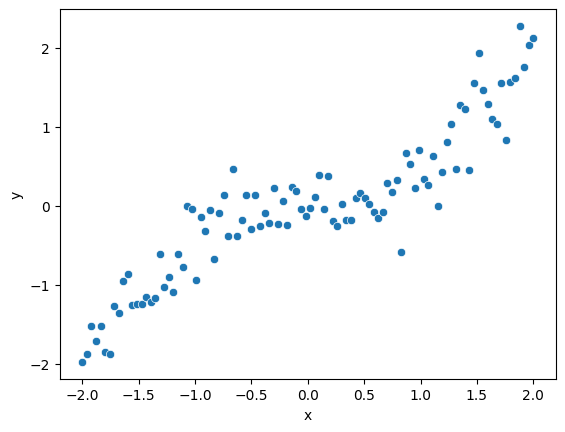

In [15]:
# show data
sns.scatterplot(data=data, x="x", y="y")

Ce n'est plus linaire avec les fausse donnée 
![Texte alternatif](./img/regrLinaire_location_2.png "Titre de l'image").

In [16]:
X = data.drop(["y"], axis=1)
Y = data["y"]
model.fit(X, Y)
Ypred = model.predict(X)
model.score(X, Y)

0.8999791517438402

<Axes: xlabel='x', ylabel='y'>

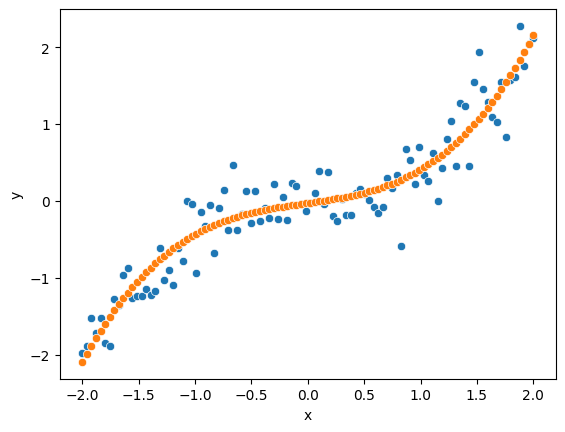

In [17]:
# show data
sns.scatterplot(data=data, x="x", y="y")
sns.scatterplot(data=data, x="x", y=Ypred)

Le support vector machine est une regression linaire automatique, il monte de degre pour trouver la meilleur regression linaire 

SVC quand Y est uen valeur discrete (on veut devenir des classe comme dans les espèce pinguins)

SVR quand Y est une valeur continue (on veut predire un prix)